# Explore data of `Le Grand Débat National - 2019`

**Purpose of this notebook**: present the structure of the data and preliminary treatment.

## Load data

In [13]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
import missingno as msno

In [7]:
CSV_PATH = Path("../data/LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv")

In [8]:
df = pd.read_csv(CSV_PATH)
df.sample(1)

/tmp/ipykernel_11105/552173521.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,QUXVlc3Rpb246MTYy - Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?,QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?,QUXVlc3Rpb246MTY0 - Quels sont selon vous les impôts qu'il faut baisser en priorité ?,"QUXVlc3Rpb246MjA2 - Afin de financer les dépenses sociales, faut-il selon vous...","QUXVlc3Rpb246MjA1 - S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?",QUXVlc3Rpb246MTY1 - Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?,"QUXVlc3Rpb246MTY2 - Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?",QUXVlc3Rpb246MTY3 - Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?
86963,UHJvcG9zYWw6M2Y3MzY2N2ItMzJhYy0xMWU5LWJmNTYtZm...,3-95252,"Plus de service publics, plus de justice fiscale",2019-02-17 13:04:59,2019-02-17 13:04:59,NaN,False,NaN,VXNlcjpiYmRlOGM5MC0zMmE3LTExZTktYmY1Ni1mYTE2M2...,NaN,75020.0,Education populaire à l'école : expliquer le f...,"Retour de l'ISF, fin du CICE, taxation des bén...",TVA à 0% sur les produits de première nécessité,Rien de tout ça. Augmenter les cotisations soc...,NaN,"Santé, retraites, chômage.",Le renforcement de tous les services publics.,Mettons en place des sanctions commerciales po...


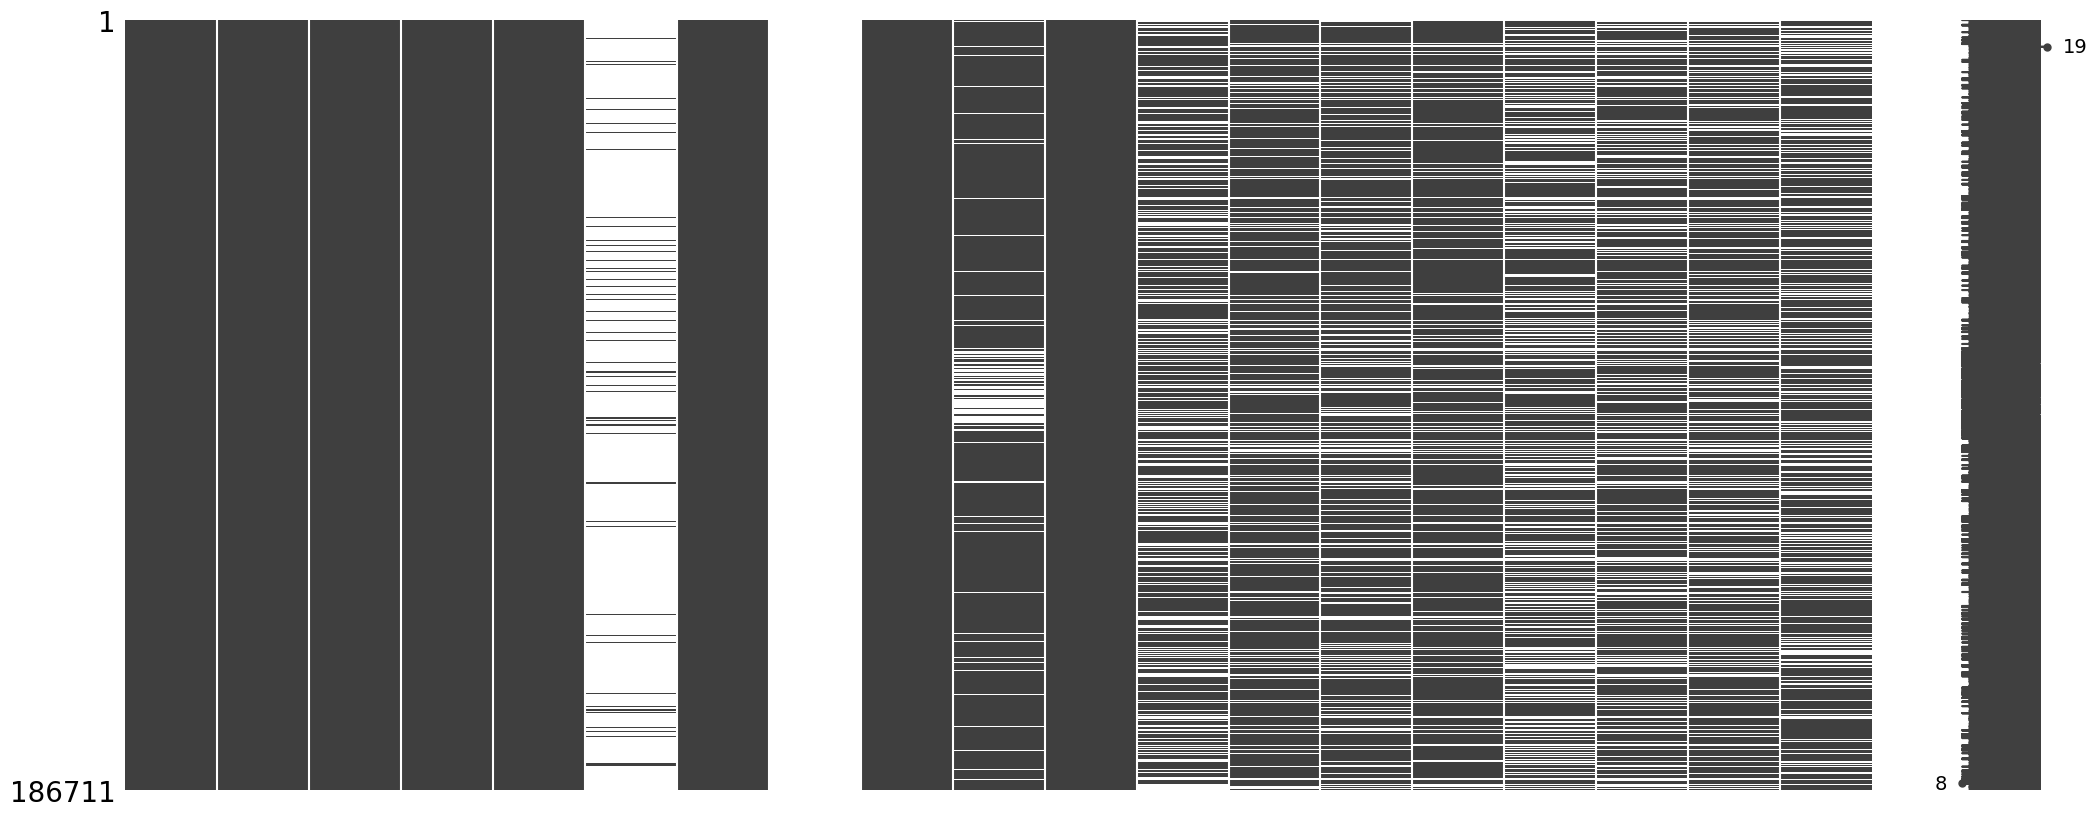

In [19]:
msno.matrix(df)
plt.xticks([]) # avoid to display name of column too large
plt.show()

**Observations**
- the column are the questions, and row the id of the contributor.
- presence of `NaN`.
- two columns are empty or quasi-empy

## Explore the questions

Explore the following question:
>`QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?`

In [23]:
col = "QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?"
idx_question = df.columns.get_loc(col)
print(f'{idx_question=}')

idx_question=12


nbr_total=154140
max(length_contribution)=80412
min(length_contribution)=1
max(words_contribution)=13240
min(words_contribution)=1


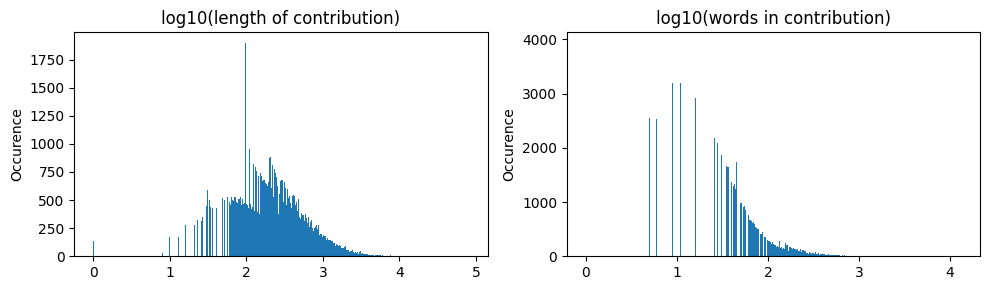

In [50]:
contributions = df.loc[:, col].dropna().values

nbr_total = len(contributions)
length_contribution = [len(c) for c in contributions]
words_contribution = [len(c.split(' ')) for c in contributions]

print(f"{nbr_total=}")
print(f"{max(length_contribution)=}")
print(f"{min(length_contribution)=}")
print(f"{max(words_contribution)=}")
print(f"{min(words_contribution)=}")

fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

axes[0].hist(np.log10(length_contribution), bins=1000)
axes[0].set_ylabel("Occurence")
axes[0].set_title("log10(length of contribution)")

axes[1].hist(np.log10(words_contribution), bins=1000)
axes[1].set_ylabel("Occurence")
axes[1].set_title("log10(words in contribution)")

plt.tight_layout()
plt.show()

**Observations**
- lengths of contributions between 1 and 10_000 characters.
- words in contributions between 1 and 1_000 words

Example of contribution:

In [55]:
from pprint import pprint 
contrib = np.random.choice(contributions)
pprint(contrib)

('continuer les démarches entreprise en supprimant les impôts injustes (taxe '
 "d'habitation, redevance TV, TVA sur certain produit alimentaire de base "
 'encore à 20%, impôts sur la fortune immobilière) et créer des impôts plus '
 'juste comment un impôts sur les fortunes financière et sur le capital (le '
 "problème de l'ancien impôts sur la fortune est qu'il n'était pas payé "
 'justement par les plus riche)')
